#### Classification Models

In [ ]:
# MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", as_frame=False)
# default is to return as df, but image data within frames doesnt make sense

In [ ]:
mnist.DESCR
mnist.data #input data, typically 2D numpy array
mnist.target #labels, usually 1d numpy array

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
dataset, labels = mnist.data, mnist.target
dataset.shape
# each image is 28x28 pixels, 784 features total

(70000, 784)

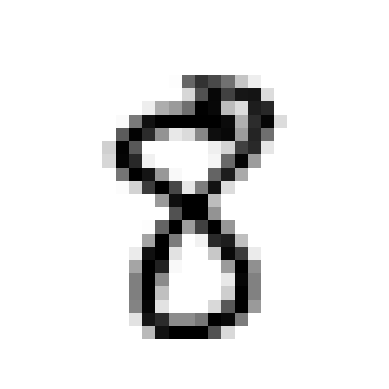

In [11]:
import matplotlib.pyplot as plt
def plotDigit(data):
    plt.imshow(data.reshape(28,28), cmap="binary")
    plt.axis("off")

plotDigit(dataset[46])
plt.show()

In [13]:
labels[46]

'8'

In [14]:
# Mnist dataset is actually already split into train/test

trainData, testData, trainLabels, testLabels = dataset[:60000], dataset[60000:], labels[:60000], labels[60000:]

#### Training A Binary Classifier

In [18]:
# First, lets just do the number 5
trainLabels5 = (trainLabels=="5")
testLabels5 = (testLabels=="5")

# Stochastic Gradient Descent Classifier
# SGD is good for large datasets, deals with training independently, one at a time
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42)
sgd.fit(trainData, trainLabels5)

SGDClassifier(random_state=42)

In [21]:
sgd.predict([trainData[0]])

array([ True])

#### Performance Measures

In [24]:
# Cross Validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd, trainData, trainLabels5, cv=3, scoring="accuracy", n_jobs=-1)

array([0.95035, 0.96035, 0.9604 ])

In [26]:
# comparing this to a dummy classifier
# the dummy just classifies every image as the most common class (non-5)
# this is equivalent to blindly making the statistically most likely guess without
# actually knowing anything about the image
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
cross_val_score(dummy, trainData, trainLabels5, cv=3, scoring="accuracy", n_jobs=-1)

array([0.90965, 0.90965, 0.90965])

Accuracy is usually not the best performance metric for classifiers, instead try the Confusion Matrix (CM)

#### Confusion Matrices

In [29]:
# A confusion matrix counts the number of times instances of A are classified as B,
# for all A/B pairs.
# ie. times 0 is counted as 8, 1 is counted as 7, etc

# First step: get a set of predictions so they can be compared to actual targets
from sklearn.model_selection import cross_val_predict
predictedLabels = cross_val_predict(sgd, trainData, trainLabels5, cv=3, n_jobs=-1)

In [ ]:
from sklearn.metrics import confusion_matrix
(confusion_matrix(trainLabels5, predictedLabels) / len(trainLabels5)).round(3)
# Vals along diagonal are correct, off diagonal = bad prediction

array([[0.898, 0.011],
       [0.032, 0.059]])